In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("spam_ham_dataset.csv")

In [5]:
print(df)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1             0  
2             0  
3  

In [6]:
print(df.shape)

(5171, 4)


In [7]:
#1.Data cleaning
#2.EDA
#3.text processing
#4.Model building
#5.Evaluation
#6.Improvement
#7.Website
#8.Deploy

Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [9]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [10]:
df.sample(5)

,label,text,label_num
1311,ham,Subject: re : may 2001 nomination\r\nthe attac...,0
466,ham,Subject: tenaska iv\r\nbob :\r\ni understand f...,0
3873,ham,Subject: re : correction on nom for 4 / 30 / 0...,0
1812,spam,Subject: 6 et vi - codin le 6 ally baronial fy...,1
2083,ham,"Subject: hpl nom for april 24 , 2001\r\n( see ...",0


In [11]:
df.drop(columns=["label"],inplace=True)
df.sample(5)

,text,label_num
5024,Subject: first deliveries - comstock oil & gas...,0
1136,Subject: re : deal extension for 11 / 21 / 200...,0
4088,Subject: guaranteed satisfaction ! great price...,1
995,Subject: meter 9794\r\ndaren - during the saxe...,0
2734,"Subject: budget help ! !\r\nsalaries , salarie...",0


In [12]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(178)

In [14]:
df=df.drop_duplicates(keep="first")

In [15]:
df.shape

(4993, 2)

EDA

In [16]:
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [17]:
df['label_num'].value_counts()

label_num
0    3531
1    1462
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1e1bcd9ac30>,
 [Text(-0.6664987851717366, 0.8750882066195381, 'ham'),
  Text(0.6664990703116317, -0.8750879894466217, 'spam')],
 [Text(-0.36354479191185624, 0.4773208399742935, '70.72'),
  Text(0.36354494744270816, -0.47732072151633903, '29.28')])

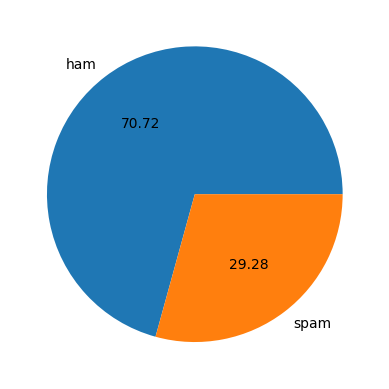

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['label_num'].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [19]:
#data is imbalanced

In [20]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import nltk

In [22]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df["characters"]=df['text'].apply(len)

In [24]:
df.head()

,text,label_num,characters
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

,text,label_num,characters,num_words
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551
3,"Subject: photoshop , windows , office . cheap ...",1,414,49
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71


In [27]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

,text,label_num,characters,num_words,num_sentences
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3


In [29]:
df[['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [30]:
df[df['label_num']==0][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [31]:
df[df['label_num']==1][['characters','num_words','num_sentences']].describe()

,characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [32]:
df2=df.drop(columns='text')

In [33]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [34]:
import seaborn as sns

<Axes: ylabel='Count'>

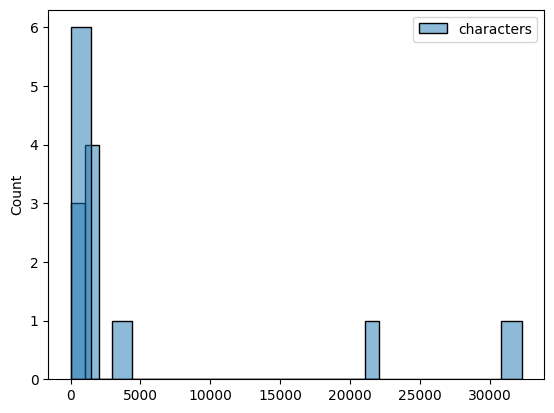

In [35]:
sns.histplot(df[df['label_num']==1][['characters']].describe())
sns.histplot(df[df['label_num']==0][['characters']].describe(),color='red')

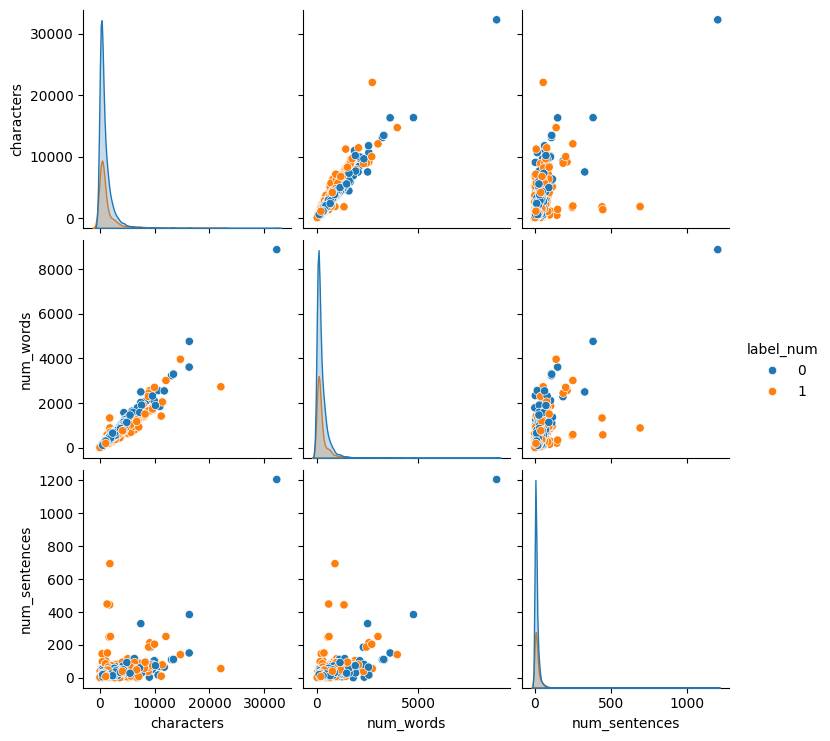

In [36]:
sns.pairplot(df,hue='label_num')

In [37]:
df2.head()

,label_num,characters,num_words,num_sentences
0,0,327,68,3
1,0,97,24,3
2,0,2524,551,24
3,1,414,49,3
4,0,336,71,3


<Axes: >

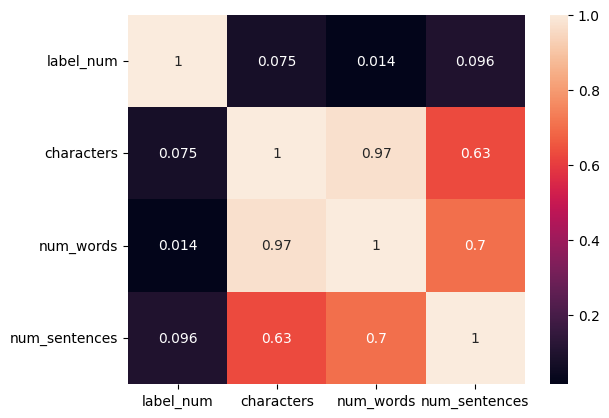

In [38]:
sns.heatmap(df2.corr(),annot=True)

In [39]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return " ".join(y)

In [45]:
transform_text("I loved the machine learning lectures. How about you?")

'love machin learn lectur'

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sugat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem("fucking")

'fuck'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

In [47]:
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [49]:
spam_wc=wc.generate(df[df['label_num']==1]['transformed_text'].str.cat(sep=' '))

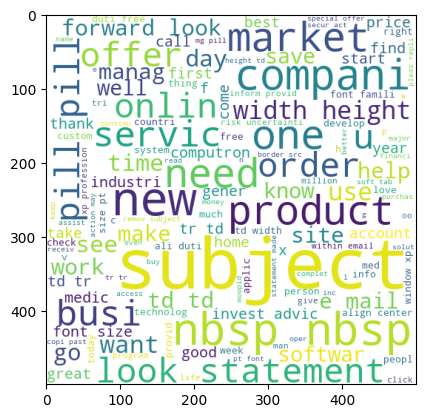

In [50]:
plt.imshow(spam_wc)

In [51]:
ham_wc=wc.generate(df[df['label_num']==0]['transformed_text'].str.cat(sep=' '))

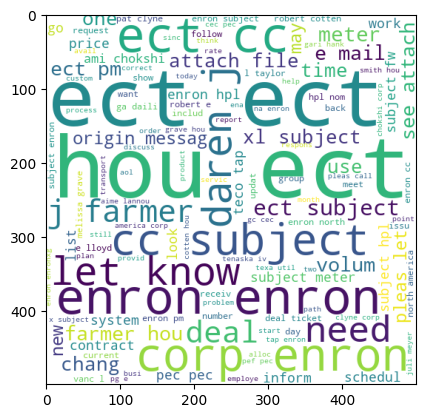

In [52]:
plt.imshow(ham_wc)

In [53]:
df.head()

,text,label_num,characters,num_words,num_sentences,transformed_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,68,3,subject enron methanol meter 988291 follow not...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,24,3,subject hpl nom januari 9 2001 see attach file...
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,"Subject: photoshop , windows , office . cheap ...",1,414,49,3,subject photoshop window offic cheap main tren...
4,Subject: re : indian springs\r\nthis deal is t...,0,336,71,3,subject indian spring deal book teco pvr reven...


In [54]:
spam_corpus=[]
for msg in df[df['label_num']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len(spam_corpus)

196592

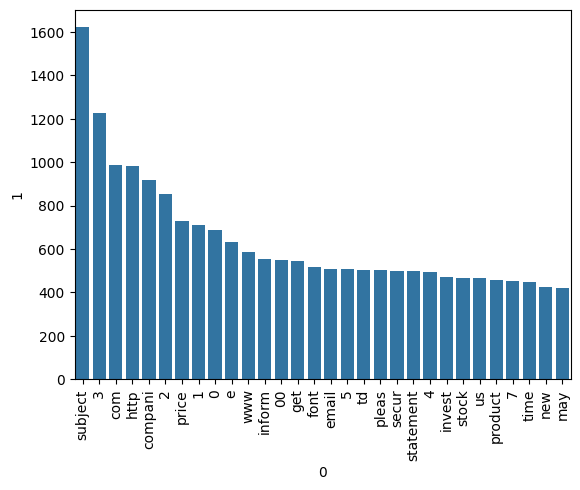

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus=[]
for msg in df[df['label_num']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

380475

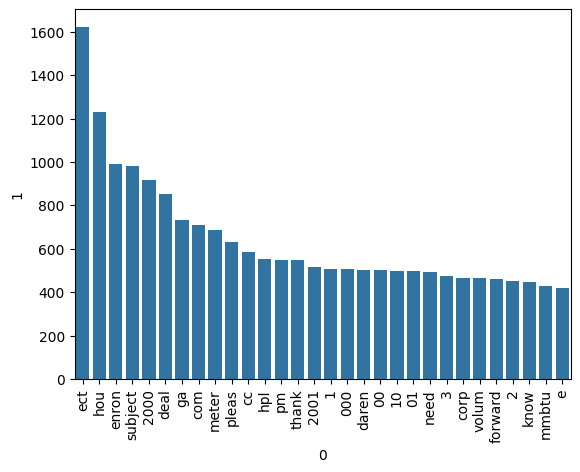

In [59]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=TfidfVectorizer()

In [61]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [62]:
X.shape

(4993, 42592)

In [63]:
y=df['label_num'].values

In [64]:
y

array([0, 0, 0, ..., 0, 0, 1])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=True)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.950950950950951
0.9155405405405406
[[679  25]
 [ 24 271]]


In [163]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.8728728728728729
0.9038461538461539
[[684  20]
 [107 188]]


In [164]:
mnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.977977977977978
0.9446254071661238
[[687  17]
 [  5 290]]


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
lr=LinearRegression()
dtc=DecisionTreeClassifier()
adc=AdaBoostClassifier(n_estimators=100)
kn=KNeighborsClassifier()
rfc=RandomForestClassifier()
gpc=GaussianProcessClassifier()
svc=SVC()

In [ ]:
from tqdm import tqdm

In [76]:
models={
    "SVC":svc,
    "KN":kn,
    "RFC":rfc,
    "GPC":gpc,
    "SVC":svc,
    "ADC":adc,
    "LR":lr,
    "bnb":bnb,
    "mnb":mnb,
    "gnb":gnb
}

predictions={}
for (key,model) in tqdm(models.items()):
    try:
        model.fit(X_train,y_train)
        preds=model.predict(X_test)
        predictions[key]=dict()
        predictions[key]['accuracy']=accuracy_score(y_test,preds)
        predictions[key]['precision']=precision_score(y_test,preds)
    except:
        print(key)

SVC


C:\Users\sugat\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


LR


In [88]:
dict_items=predictions.items()

<class 'dict_items'>


In [102]:
predictions=dict(sorted(predictions.items(),key=lambda x:x[1].get('precision',0),reverse=True))

In [103]:
len(predictions)

8

In [104]:
predictions_df = {
    'Algorithm': [],   # Corrected dictionary key
    'Accuracy': [],    # Make sure you're using the correct key in predictions_df
    'Precision': []    # Use correct key names in predictions_df
}

for key, metrics in predictions.items():
    predictions_df['Algorithm'].append(key)
    predictions_df['Accuracy'].append(metrics.get('accuracy',0))  # Corrected: predictions_df, not predictions
    predictions_df['Precision'].append(metrics.get('precision',0))  # Same here: predictions_df


In [105]:
algo_df=pd.DataFrame(predictions_df)

In [106]:
print(algo_df.head())

  Algorithm  Accuracy  Precision
0       mnb  0.904905   0.990196
1        KN  0.964965   0.977941
2       GPC  0.981982   0.954098
3       RFC  0.974975   0.947020
4       ADC  0.955956   0.922559


In [107]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))